In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/kaggle/input/cw-dataset-sp/Breast_Cancer_Mortality_Survival_Dataset.csv')
print('done !')

done !


In [2]:
# Second Model - Predictive machine-learning models to estimate patient’s survival period.
# Decision Tree Regressor
# MSE
# MAE
# R2

In [3]:
print('Before conversion :\n',data.columns)

Before conversion :
 Index(['Patient ID ', 'Moth of Birth', 'Age', 'Sex', 'Race', 'Marital Status',
       'Occupation Code', 'Adopted Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Mortality_Status'],
      dtype='object')


In [4]:
print('Before conversion :\n',data.columns)
# Replace spaces in column headers with underscores
data.columns = data.columns.str.replace(' ', '_')

print('After conversion :\n',data.columns)

# Save the updated dataframe to a new CSV file (optional)
data.to_csv('/kaggle/working/Updated_Dataset.csv', index=False)


Before conversion :
 Index(['Patient ID ', 'Moth of Birth', 'Age', 'Sex', 'Race', 'Marital Status',
       'Occupation Code', 'Adopted Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Mortality_Status'],
      dtype='object')
After conversion :
 Index(['Patient_ID_', 'Moth_of_Birth', 'Age', 'Sex', 'Race', 'Marital_Status',
       'Occupation_Code', 'Adopted_Status', 'T_Stage_', 'N_Stage', '6th_Stage',
       'differentiate', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')


In [5]:
# Check for missing values and data types
missing_values = data.isnull().sum()
print('Missing values:\n', missing_values)

# Drop irrelevant features
data = data.drop(columns=['Patient_ID_', 'Moth_of_Birth'])

# Standardize the target variable
data['Mortality_Status'] = data['Mortality_Status'].str.strip().str.lower()
data['Mortality_Status'] = data['Mortality_Status'].replace({'alive': 0, 'dead': 1})

# Handle missing values
numerical_columns = ['Age', 'Occupation_Code', 'Tumor_Size', 'Regional_Node_Examined']
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Ensure numeric conversion
    data[col] = data[col].fillna(data[col].median())

data['Sex'] = data['Sex'].fillna(data['Sex'].mode()[0])
data = data.dropna(subset=['Mortality_Status'])
print('Data cleaning completed!')


Missing values:
 Patient_ID_                0
Moth_of_Birth              0
Age                        9
Sex                       77
Race                       0
Marital_Status             0
Occupation_Code            3
Adopted_Status             0
T_Stage_                   0
N_Stage                    0
6th_Stage                  0
differentiate              0
Grade                      0
A_Stage                    0
Tumor_Size                 3
Estrogen_Status            0
Progesterone_Status        0
Regional_Node_Examined     1
Reginol_Node_Positive      0
Survival_Months            0
Mortality_Status           4
dtype: int64
Data cleaning completed!


/tmp/ipykernel_30/2478455111.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Mortality_Status'] = data['Mortality_Status'].replace({'alive': 0, 'dead': 1})


In [6]:
# Apply the filtering conditions
df = data[
    (data['Age'] >= 18) & (data['Age'] <= 85) & 
    (data['Tumor_Size'] >= 1.0) & (data['Tumor_Size'] <= 250.0) & 
    (data['Regional_Node_Examined'] >= 0.0) & (data['Regional_Node_Examined'] <= 50.0) 
]

# Display the filtered dataframe to verify
print(df)

# Save the filtered dataframe to a new CSV file (optional)
df.to_csv('/kaggle/working/Filtered_Dataset.csv', index=False)


       Age     Sex   Race Marital_Status  Occupation_Code  Adopted_Status  \
0     68.0  Female  White        Married             11.0               1   
1     50.0  Female  White        Married             11.0               0   
2     58.0  Female  White       Divorced              9.0               0   
3     58.0  Female  White        Married             10.0               0   
4     47.0  Female  White        Married             12.0               0   
...    ...     ...    ...            ...              ...             ...   
4019  62.0  Female  Other        Married              8.0               1   
4020  56.0  Female  White       Divorced              3.0               0   
4021  68.0  Female  White        Married              2.0               1   
4022  58.0  Female  Black       Divorced              8.0               0   
4023  46.0  Female  White        Married             11.0               1   

     T_Stage_ N_Stage 6th_Stage              differentiate  Grade   A_Stage

In [7]:
filtered_ranges = {
    "Age": (df['Age'].min(), df['Age'].max()),
    "Tumor_Size": (df['Tumor_Size'].min(), df['Tumor_Size'].max()),
    "Regional_Node_Examined": (df['Regional_Node_Examined'].min(), df['Regional_Node_Examined'].max()),
    "Regional_Node_Positive": (df['Reginol_Node_Positive'].min(), df['Reginol_Node_Positive'].max()),
}

non_filtered_ranges = {
    "Age": (data['Age'].min(), data['Age'].max()),
    "Tumor_Size": (data['Tumor_Size'].min(), df['Tumor_Size'].max()),
    "Regional_Node_Examined": (data['Regional_Node_Examined'].min(), data['Regional_Node_Examined'].max()),
    "Regional_Node_Positive": (data['Reginol_Node_Positive'].min(), data['Reginol_Node_Positive'].max()),
}

for column, (min_val, max_val) in non_filtered_ranges.items():
    print(f"{column} min: {min_val}, max: {max_val}")
    
print('\n ---------------------------- \n')

for column, (min_val, max_val) in filtered_ranges.items():
    print(f"{column} min: {min_val}, max: {max_val}")


Age min: 30.0, max: 502.0
Tumor_Size min: -75.0, max: 140.0
Regional_Node_Examined min: 1.0, max: 1080.0
Regional_Node_Positive min: 1, max: One

 ---------------------------- 

Age min: 30.0, max: 69.0
Tumor_Size min: 1.0, max: 140.0
Regional_Node_Examined min: 1.0, max: 49.0
Regional_Node_Positive min: 1, max: One


In [8]:
# Check for non-numeric entries in numerical columns
numerical_features = [
    "Age", 
    "Tumor_Size", 
    "Regional_Node_Examined", 
    "Reginol_Node_Positive", 
    "Estrogen_Status", 
    "Progesterone_Status", 
    "Race", 
    "Marital_Status", 
    "T_Stage", 
    "N_Stage", 
    "6th_Stage"
]
numerical_features = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']
for col in numerical_features:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in Age: [68. 50. 58. 47. 51. 40. 69. 46. 65. 48. 62. 61. 56. 43. 60. 57. 55. 63.
 66. 53. 59. 54. 49. 64. 42. 37. 67. 31. 52. 33. 45. 38. 39. 36. 41. 44.
 32. 34. 35. 30.]
Unique values in Tumor_Size: [  4.  35.  63.  18.  41.  20.   8.  30. 103.  32.  13.  59.  15.  19.
  46.  24.  25.  29.  40.  70.  22.  50.  17.  21.  10.  27.  23.   5.
  51.   9.  55. 120.  77.   2.  11.  12.  26.  75. 130.  34.  80.   3.
  60.  14.  16.  45.  36.  76.  38.  49.   7.  72. 100.  43.  62.  37.
  68.  52.  85.  57.  39.  28.  48. 110.  65.   6. 105. 140.  42.  31.
  90. 108.  98.  47.  54.  61.  74.  33.   1.  87.  81.  58. 117.  44.
 123. 133.  95. 107.  92.  69.  56.  82.  66.  78.  97.  88.  53.  83.
 101.  84. 115.  73. 125. 104.  94.  86.  64.  96.  79.  67.]
Unique values in Regional_Node_Examined: [24. 14.  2.  3. 18. 11.  9. 20. 21. 13. 23. 16.  1. 22. 15.  4. 26. 31.
 25. 10.  5.  6. 19. 12.  8. 17.  7. 49. 33. 30. 34. 28. 32. 27. 42. 29.
 41. 39. 46. 40. 44. 38. 47. 36. 37. 35

In [9]:
# Define the columns to analyze
columns_to_check = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']

# Ensure all values in the columns are numeric
for column in columns_to_check:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert non-numeric values to NaN

# Calculate and display the max and min values for these columns
min_max_values = df[columns_to_check].agg(['min', 'max'])
print("Max and Min Values for Selected Columns:")
print(min_max_values)


Max and Min Values for Selected Columns:
      Age  Tumor_Size  Regional_Node_Examined  Reginol_Node_Positive
min  30.0         1.0                     1.0                    1.0
max  69.0       140.0                    49.0                   41.0


/tmp/ipykernel_30/1494705372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert non-numeric values to NaN


In [10]:
# Replace non-numeric values like 'One' with numeric equivalents
for col in numerical_features:
    df[col] = df[col].replace('One', 1)  
    df[col] = pd.to_numeric(df[col], errors='coerce')  
    df[col] = df[col].fillna(df[col].median())  # Fill missing values with median(most used)

scaler = StandardScaler()

# Now scale numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Numerical features scaled successfully!")


Numerical features scaled successfully!


/tmp/ipykernel_30/1228152761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('One', 1)
/tmp/ipykernel_30/1228152761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/tmp/ipykernel_30/1228152761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [34]:
# Inspect feature ranges
print("Feature Ranges:")
print(data.describe().loc[['min', 'max']])

print('-----------------------------------------------------------')
# Verify scaled ranges
scaled_ranges = df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']].agg(['mean', 'std', 'min', 'max'])
print("Feature Statistics (After Scaling):")
print(scaled_ranges)


Feature Ranges:
       Age  Occupation_Code  Adopted_Status  Grade  Tumor_Size  \
min   30.0              1.0             0.0    1.0       -75.0   
max  502.0             16.0             1.0    4.0       140.0   

     Regional_Node_Examined  Survival_Months  Mortality_Status  
min                     1.0              1.0               0.0  
max                  1080.0            760.0               1.0  
-----------------------------------------------------------
Feature Statistics (After Scaling):
               Age    Tumor_Size  Regional_Node_Examined  \
mean -3.721975e-17 -2.392698e-17           -2.791481e-17   
std   1.000125e+00  1.000125e+00            1.000125e+00   
min  -2.676376e+00 -1.395631e+00           -1.681808e+00   
max   1.676490e+00  5.189833e+00            4.396619e+00   

      Reginol_Node_Positive  
mean           1.063421e-17  
std            1.000125e+00  
min           -6.204876e-01  
max            7.301598e+00  


In [12]:
print( df.columns)

# Drop irrelevant columns only if they exist
columns_to_drop = [col for col in ['Patient_ID', 'Mortality_Status'] if col in df.columns]
df = df.drop(columns=columns_to_drop)

print("Remaining columns:", df.columns)


Index(['Age', 'Sex', 'Race', 'Marital_Status', 'Occupation_Code',
       'Adopted_Status', 'T_Stage_', 'N_Stage', '6th_Stage', 'differentiate',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')
Remaining columns: Index(['Age', 'Sex', 'Race', 'Marital_Status', 'Occupation_Code',
       'Adopted_Status', 'T_Stage_', 'N_Stage', '6th_Stage', 'differentiate',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months'],
      dtype='object')


In [13]:
# Clean and preprocess the dataset
df['Survival_Months'] = pd.to_numeric(df['Survival_Months'], errors='coerce')
df['Survival_Months'] = df['Survival_Months'].fillna(df['Survival_Months'].median())

# Encode categorical features
categorical_features = ['Sex', 'Race', 'Marital_Status', 'T_Stage_', 'N_Stage', 
                        '6th_Stage', 'differentiate', 'Estrogen_Status', 'Progesterone_Status', 'A_Stage']
from sklearn.preprocessing import LabelEncoder
label_encoders = {col: LabelEncoder() for col in categorical_features}

for col in categorical_features:
    df[col] = label_encoders[col].fit_transform(df[col])

# Scale numerical features
from sklearn.preprocessing import StandardScaler
numerical_features = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("Preprocessing completed!")


Preprocessing completed!


In [14]:
# Define features and target
X = df.drop(columns=['Survival_Months'])
y = df['Survival_Months']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (3207, 17), Test set: (802, 17)


In [15]:
# Check for missing values in the dataset
print("Missing values in X_train:", X_train.isnull().sum())
print("Missing values in X_test:", X_test.isnull().sum())

# Verify if there are missing values across the dataset
print("Total missing values in X_train:", X_train.isnull().sum().sum())
print("Total missing values in X_test:", X_test.isnull().sum().sum())


Missing values in X_train: Age                       0
Sex                       0
Race                      0
Marital_Status            0
Occupation_Code           0
Adopted_Status            0
T_Stage_                  0
N_Stage                   0
6th_Stage                 0
differentiate             0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
dtype: int64
Missing values in X_test: Age                       0
Sex                       0
Race                      0
Marital_Status            0
Occupation_Code           0
Adopted_Status            0
T_Stage_                  0
N_Stage                   0
6th_Stage                 0
differentiate             0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_No

In [16]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns
imputer = SimpleImputer(strategy="median")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Check again for missing values after imputation
print("Total missing values in X_train after imputation:", X_train.isnull().sum().sum())
print("Total missing values in X_test after imputation:", X_test.isnull().sum().sum())


Total missing values in X_train after imputation: 0
Total missing values in X_test after imputation: 0


In [17]:
# Check data types of X_train and X_test
print(X_train.dtypes)

# Convert to numeric if necessary
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Verify conversion
print("Data types corrected!")


Age                       float64
Sex                       float64
Race                      float64
Marital_Status            float64
Occupation_Code           float64
Adopted_Status            float64
T_Stage_                  float64
N_Stage                   float64
6th_Stage                 float64
differentiate             float64
Grade                     float64
A_Stage                   float64
Tumor_Size                float64
Estrogen_Status           float64
Progesterone_Status       float64
Regional_Node_Examined    float64
Reginol_Node_Positive     float64
dtype: object
Data types corrected!


In [18]:
# Initialize and train the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Predict survival months on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Mean Squared Error (MSE):",mse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared (R2):",r2)


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.816277550318844
Mean Absolute Error (MAE): 0.7307978045559952
R-Squared (R2): -0.005532945976972403


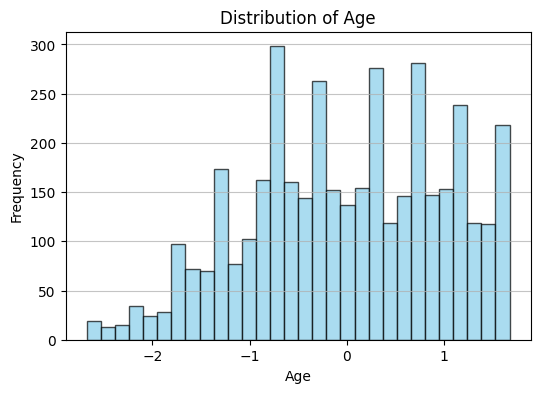

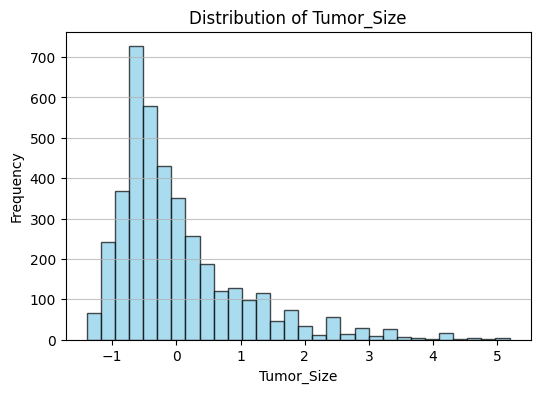

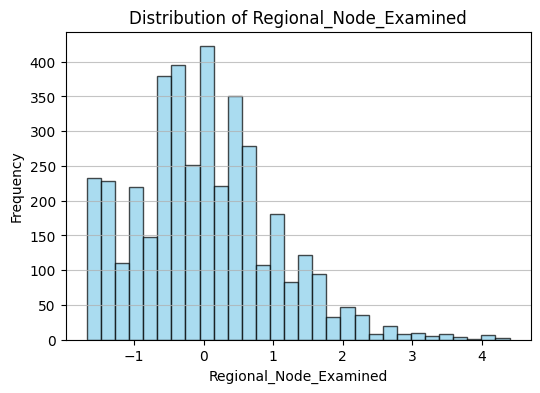

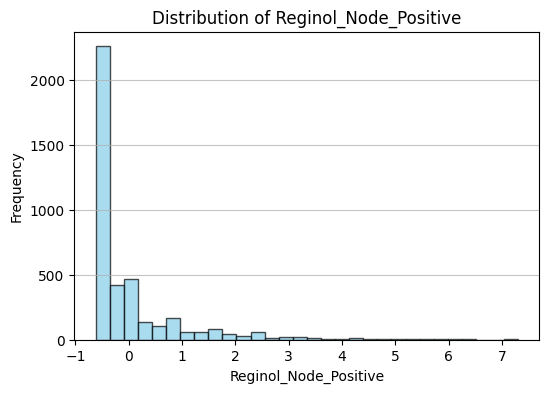

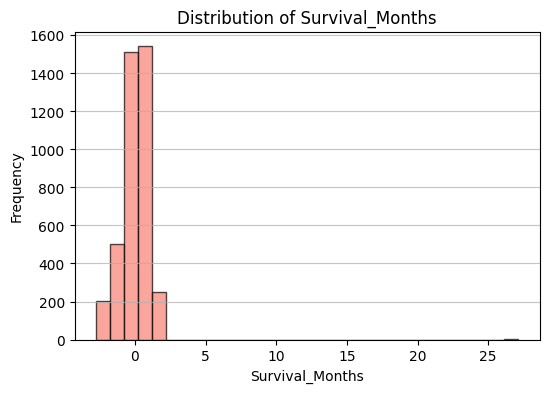

In [19]:
# Retained input variables and the target variable
retained_features = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']
target_variable = 'Survival_Months'

# Plot the distributions for retained input variables
for feature in retained_features:
    plt.figure(figsize=(6, 4))
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Plot the distribution for the target variable
plt.figure(figsize=(6, 4))
plt.hist(df[target_variable], bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of {target_variable}")
plt.xlabel(target_variable)
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


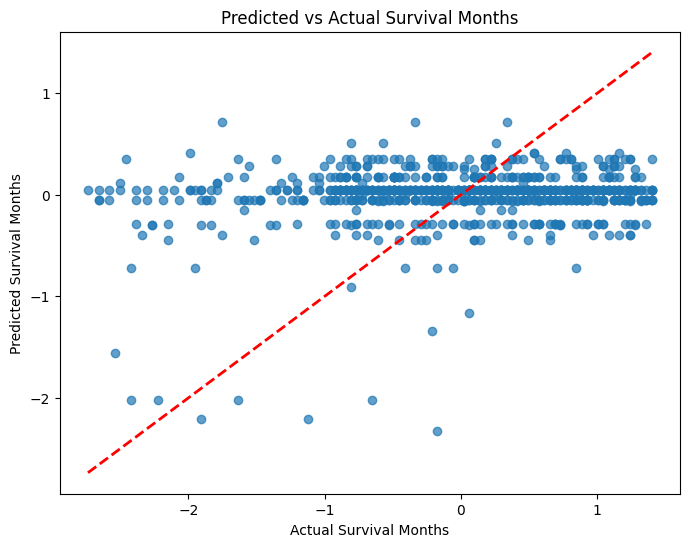

In [20]:
# Scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicted vs Actual Survival Months")
plt.xlabel("Actual Survival Months")
plt.ylabel("Predicted Survival Months")
plt.show()


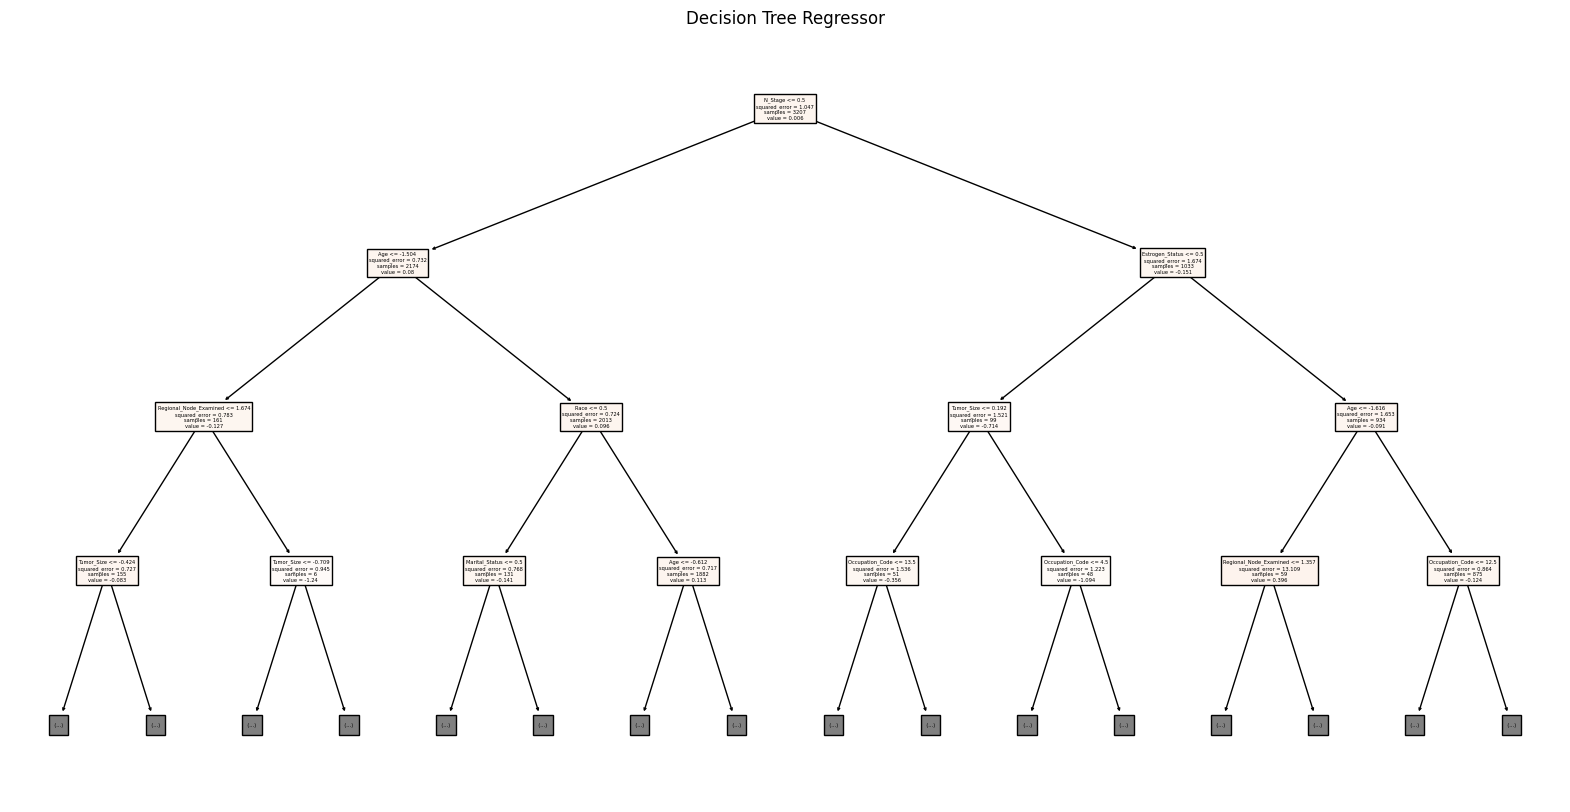

In [21]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Decision Tree Regressor")
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                           param_grid, cv=5, scoring='r2', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best CV R-Squared:", best_score)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV R-Squared: -0.011758640190289715


In [23]:
# Use the best model from GridSearchCV
best_dt_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_tuned = best_dt_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Evaluation of Tuned Decision Tree Model:")
print('Mean Squared Error (MSE):', mse_tuned)
print('Mean Absolute Error (MAE):',mae_tuned)
print('R-Squared (R2): ',r2_tuned)


Evaluation of Tuned Decision Tree Model:
Mean Squared Error (MSE): 0.7920850097864709
Mean Absolute Error (MAE): 0.7208301817410365
R-Squared (R2):  0.024268677922499537


In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize Random Forest and Gradient Boosting models
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100)

# Train models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Evaluation:")
print("Mean Squared Error (MSE): ", mse_rf)
print("Mean Absolute Error (MAE): ",mae_rf)
print("R-Squared (R2): ", r2_rf)

# Evaluate Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Evaluation:")
print("Mean Squared Error (MSE):" ,mse_gb)
print("Mean Absolute Error (MAE):" ,mae_gb)
print("R-Squared (R2):" ,r2_gb)


Random Forest Evaluation:
Mean Squared Error (MSE):  0.822095320201628
Mean Absolute Error (MAE):  0.7355321602987908
R-Squared (R2):  -0.012699576110273059
Gradient Boosting Evaluation:
Mean Squared Error (MSE): 0.7740708262046446
Mean Absolute Error (MAE): 0.71789869252522
R-Squared (R2): 0.046459481870652075


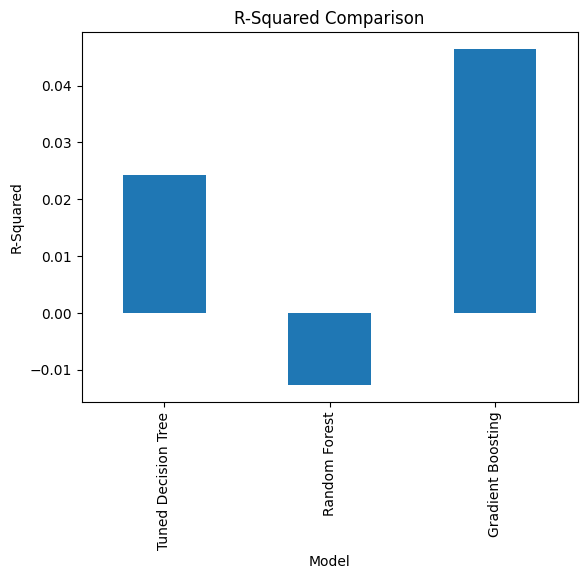

In [25]:
# Create a dataframe to keep result 
results = pd.DataFrame({
    "Model": ["Tuned Decision Tree", "Random Forest", "Gradient Boosting"],
    "MSE": [mse_tuned, mse_rf, mse_gb],
    "MAE": [mae_tuned, mae_rf, mae_gb],
    "R2": [r2_tuned, r2_rf, r2_gb]
})

# Bar plot 
results.plot(x="Model", y="R2", kind="bar", legend=False, title="R-Squared Comparison")
plt.ylabel("R-Squared")
plt.show()


In [33]:
# Display dimensions of the dataset subset for regression modelling
print("Dimensions of data subset retained for regression modelling:", df.shape)

# List features selected for modelling based on Table 1
selected_features = [
    "Age", 
    "Tumor_Size", 
    "Regional_Node_Examined", 
    "Reginol_Node_Positive", 
    "Estrogen_Status", 
    "Progesterone_Status", 
    "Race", 
    "Marital_Status", 
    "T_Stage", 
    "N_Stage", 
    "6th_Stage"
]

# Display selected features
print("Features selected for modelling: \n",selected_features)


Dimensions of data subset retained for regression modelling: (4009, 18)
Features selected for modelling: 
 ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Estrogen_Status', 'Progesterone_Status', 'Race', 'Marital_Status', 'T_Stage', 'N_Stage', '6th_Stage']


In [27]:
# Define numeric features and all retained features
numeric_features = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']
retained_features = ['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive',
                     'Estrogen_Status', 'Progesterone_Status', 'Race', 'Marital_Status', 
                     'T_Stage_', 'N_Stage', '6th_Stage']

# Define target variable
target_variable = 'Survival_Months'

# Prepare datasets for Model 1 - numeric only & Model 2 - all features
X_numeric = df[numeric_features].copy()
X_all = df[retained_features].copy()
y = df[target_variable]

# Split the data into training and test sets (80:20 split)
X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)
X_train_all, X_test_all, _, _ = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Train Decision Tree models
dt_model_numeric = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model_all = DecisionTreeRegressor(random_state=42, max_depth=5)

dt_model_numeric.fit(X_train_numeric, y_train)
dt_model_all.fit(X_train_all, y_train)

# Test both models
y_pred_numeric = dt_model_numeric.predict(X_test_numeric)
y_pred_all = dt_model_all.predict(X_test_all)

# Evaluate performance
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    print(f"Performance of {model_name}:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  R² Score: {r2:.2f}\n")

# Evaluate Model 1 (numeric features only)
evaluate_model(y_test, y_pred_numeric, "Model 1 - Numeric Features Only")

# Evaluate Model 2 (all retained features)
evaluate_model(y_test, y_pred_all, "Model 2 - All Retained Features")


Performance of Model 1 - Numeric Features Only:
  Mean Absolute Error (MAE): 0.74
  Mean Squared Error (MSE): 0.84
  Root Mean Squared Error (RMSE): 0.92
  R² Score: -0.03

Performance of Model 2 - All Retained Features:
  Mean Absolute Error (MAE): 0.73
  Mean Squared Error (MSE): 0.82
  Root Mean Squared Error (RMSE): 0.91
  R² Score: -0.01



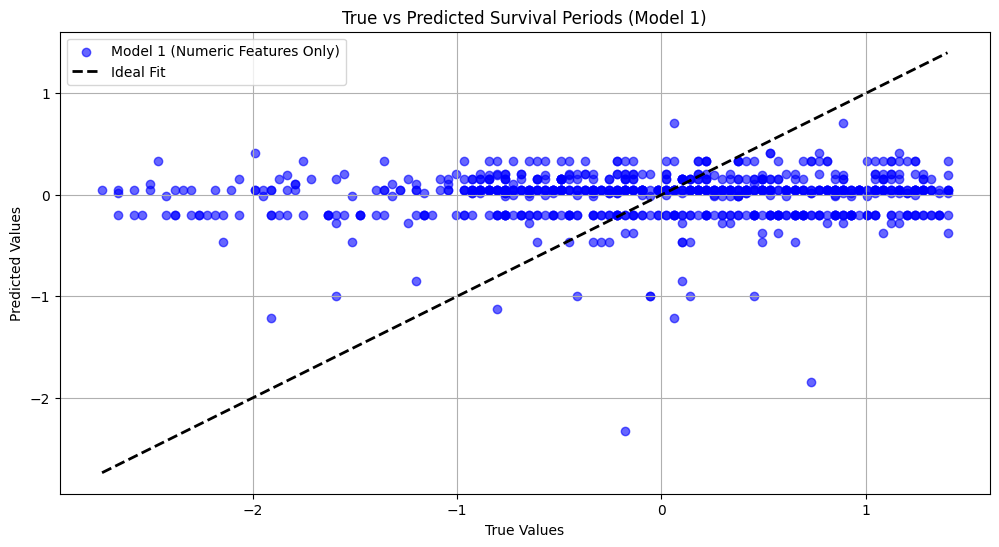

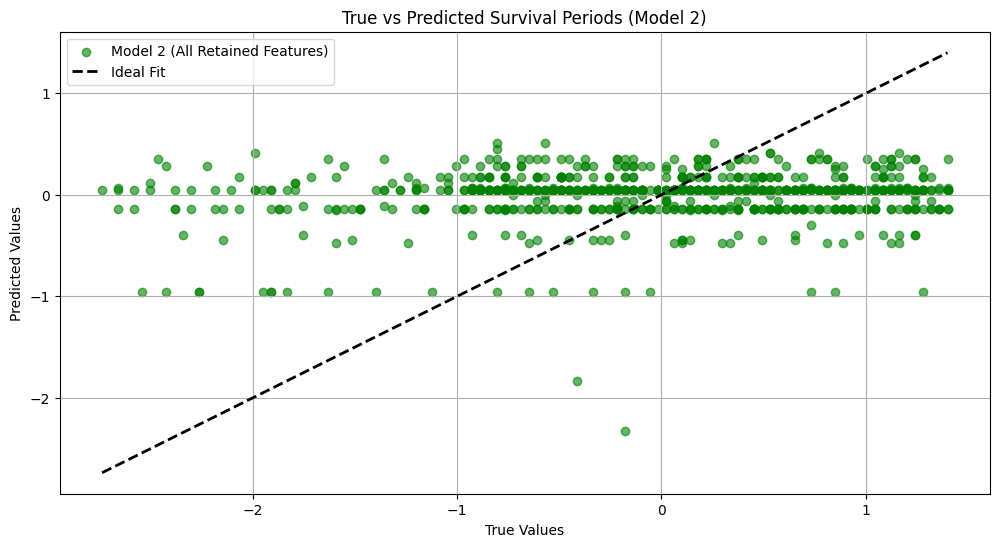

In [28]:
# Plot true vs predicted values for Model 1 - Numeric Features Only
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_numeric, color='blue', alpha=0.6, label="Model 1 (Numeric Features Only)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, label="Ideal Fit")
plt.title("True vs Predicted Survival Periods (Model 1)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Plot true vs predicted values for Model 2 - All Retained Features
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_all, color='green', alpha=0.6, label="Model 2 (All Retained Features)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, label="Ideal Fit")
plt.title("True vs Predicted Survival Periods (Model 2)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()



In [29]:
# Dimensions of training and test subsets for Model 1 - Numeric Features Only
print("Dimensions for Model 1 - Numeric Features Only:")
print(f"Training set: {X_train_numeric.shape}")
print(f"Test set: {X_test_numeric.shape}")

# Dimensions of training and test subsets for Model 2 - All Retained Features
print("\nDimensions for Model 2 - All Retained Features:")
print(f"Training set: {X_train_all.shape}")
print(f"Test set: {X_test_all.shape}")

# List features used for Model 1 and Model 2
print("\nFeatures used for Model 1 - Numeric Features Only:")
print(numeric_features)

print("\nFeatures used for Model 2 - All Retained Features:")
print(retained_features)


Dimensions for Model 1 - Numeric Features Only:
Training set: (3207, 4)
Test set: (802, 4)

Dimensions for Model 2 - All Retained Features:
Training set: (3207, 11)
Test set: (802, 11)

Features used for Model 1 - Numeric Features Only:
['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive']

Features used for Model 2 - All Retained Features:
['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Estrogen_Status', 'Progesterone_Status', 'Race', 'Marital_Status', 'T_Stage_', 'N_Stage', '6th_Stage']


Performance of Pruned Model (Max Depth = 4):
  Mean Absolute Error (MAE): 0.73
  Mean Squared Error (MSE): 0.81
  R-Squared: 0.00


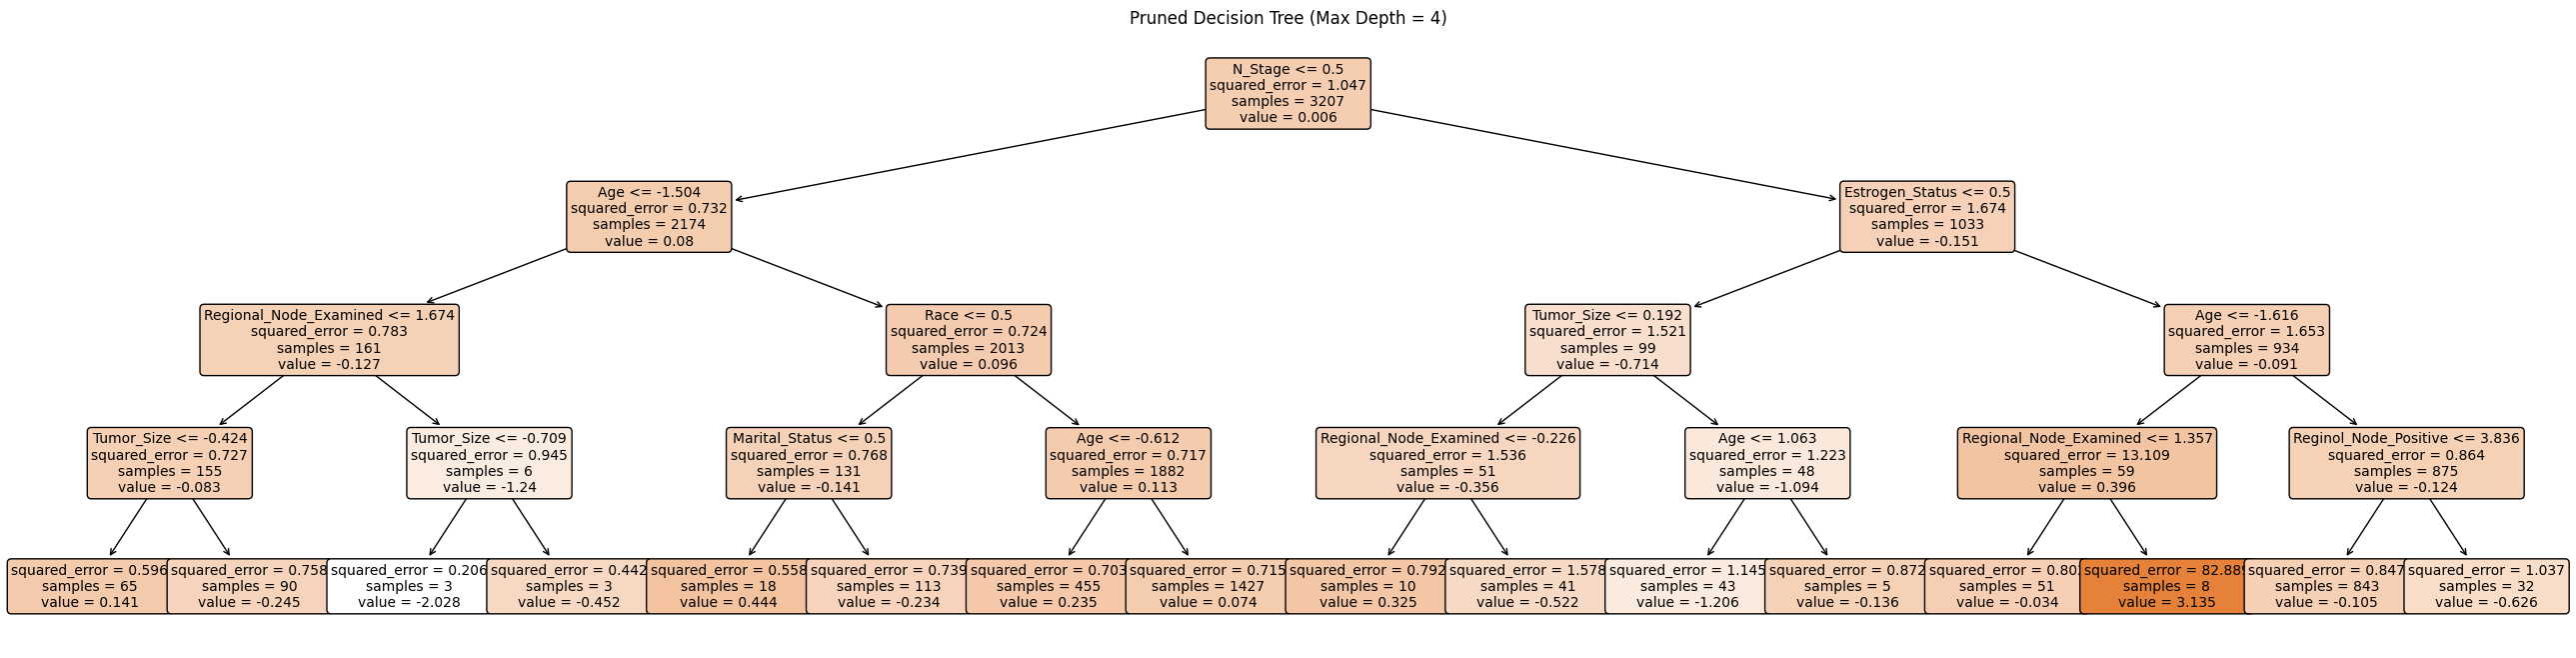

In [30]:
# Rebuild the best model with pre-pruning (limit depth to 4 levels)
pruned_model = DecisionTreeRegressor(random_state=42, max_depth=4)
pruned_model.fit(X_train_all, y_train)

# Predict using the pruned model
y_pred_pruned = pruned_model.predict(X_test_all)

# Evaluate the pruned model
pruned_mae = mean_absolute_error(y_test, y_pred_pruned)
pruned_mse = mean_squared_error(y_test, y_pred_pruned)
pruned_r2 = r2_score(y_test, y_pred_pruned)

# Display evaluation metrics
print("Performance of Pruned Model (Max Depth = 4):")
print(f"  Mean Absolute Error (MAE): {pruned_mae:.2f}")
print(f"  Mean Squared Error (MSE): {pruned_mse:.2f}")
print(f"  R-Squared: {pruned_r2:.2f}")

# Plot the pruned tree for visualization
plt.figure(figsize=(33, 8))
plot_tree(pruned_model, feature_names=X_train_all.columns, filled=True, rounded=True, fontsize=10)
plt.title("Pruned Decision Tree (Max Depth = 4)")
plt.show()


In [31]:
print(df.columns)

Index(['Age', 'Sex', 'Race', 'Marital_Status', 'Occupation_Code',
       'Adopted_Status', 'T_Stage_', 'N_Stage', '6th_Stage', 'differentiate',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months'],
      dtype='object')


In [32]:
# Define the features used during model training (from retained features)
training_features = [
    'Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive',
    'Estrogen_Status', 'Progesterone_Status', 'T_Stage_', 'N_Stage', 
    '6th_Stage', 'Adopted_Status', 'A_Stage'
]

# Input patient data in numerical format (aligned with training features)
raw_data = {
    'Age': 56,
    'Tumor_Size': 41,
    'Regional_Node_Examined': 5,
    'Reginol_Node_Positive': 1,
    'Estrogen_Status': 1,  # Positive = 1
    'Progesterone_Status': 1,  # Positive = 1
    'T_Stage_': 3,  # T3 = Encoded as 3
    'N_Stage': 3,  # N3 = Encoded as 3
    '6th_Stage': 2,  # IIIC = Encoded as 2
    'Adopted_Status': 0,  # Not Adopted = 0
    'A_Stage': 1  # Regional = 1
}

# Prepare the input for the model (aligned with training features)
patient_input = np.array([raw_data[feature] for feature in training_features]).reshape(1, -1)

# Predict survival months using the pruned model
predicted_survival_months = pruned_model.predict(patient_input)
print(f"Predicted Survival Months: {predicted_survival_months[0]:.2f}")


Predicted Survival Months: 0.07


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
